# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data (NBA_Perf_22 and nba_salaries_22), merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [3]:
# load in and examine dataframe 1
nba_salaries = pd.read_csv('2025_salaries.csv', encoding = 'latin-1', header = 1)
nba_salaries.head()

,Player,Tm,2025-26
0,Jaden Springer,NOP,"$70,732"
1,Garrison Mathews,IND,"$131,970"
2,Garrison Mathews,IND,"$131,970"
3,Mac McClung,IND,"$164,060"
4,Didi Louzada,POR,"$268,032"


In [4]:
# load in and examine dataframe 2
nba_stats_old = pd.read_csv('nba_2025.txt', sep=',')
nba_stats_old.head(20)

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,1.0,Shai Gilgeous-Alexander,27.0,OKC,PG,49.0,49.0,1632.0,534.0,964.0,...,218.0,314.0,64.0,38.0,103.0,101.0,1558.0,0.0,NaN,gilgesh01
1,2.0,Tyrese Maxey,25.0,PHI,PG,52.0,52.0,2008.0,524.0,1117.0,...,214.0,351.0,102.0,40.0,126.0,118.0,1503.0,0.0,NaN,maxeyty01
2,3.0,Donovan Mitchell,29.0,CLE,SG,51.0,51.0,1719.0,516.0,1060.0,...,229.0,302.0,79.0,15.0,159.0,125.0,1478.0,0.0,NaN,mitchdo01
3,4.0,Jaylen Brown,29.0,BOS,SF,49.0,49.0,1676.0,534.0,1105.0,...,336.0,229.0,49.0,20.0,176.0,136.0,1435.0,2.0,NaN,brownja02
4,5.0,Luka Dončić,26.0,LAL,PG,42.0,42.0,1492.0,437.0,923.0,...,329.0,360.0,61.0,19.0,179.0,102.0,1379.0,6.0,NaN,doncilu01
5,6.0,Jalen Brunson,29.0,NYK,PG,50.0,50.0,1728.0,481.0,1024.0,...,166.0,305.0,36.0,5.0,110.0,116.0,1351.0,0.0,NaN,brunsja01
6,7.0,Anthony Edwards,24.0,MIN,SG,46.0,46.0,1632.0,463.0,940.0,...,240.0,171.0,62.0,38.0,124.0,84.0,1348.0,0.0,NaN,edwaran01
7,8.0,Kevin Durant,37.0,HOU,SF,50.0,50.0,1835.0,452.0,894.0,...,267.0,222.0,42.0,44.0,161.0,101.0,1291.0,0.0,NaN,duranke01
8,9.0,Jamal Murray,28.0,DEN,PG,50.0,50.0,1780.0,454.0,937.0,...,219.0,380.0,48.0,19.0,115.0,78.0,1286.0,0.0,NaN,murraja01
9,10.0,Julius Randle,31.0,MIN,PF,56.0,56.0,1882.0,438.0,891.0,...,391.0,302.0,62.0,14.0,144.0,159.0,1251.0,3.0,NaN,randlju01


In [5]:
#Drop unneeded variables 
y_stats = nba_stats_old.columns.to_list()
print(y_stats)

nba_stats = nba_stats_old.drop(columns = ['Rk','GS','Age','Pos','FG%','FGA','3P%','3PA','2P%','2PA','FT%','FTA','ORB','DRB','Player-additional','Awards','Trp-Dbl','PF','TOV','eFG%',])

['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Awards', 'Player-additional']


In [6]:
#Drop duplicates
nba_stats["2TM"] = (nba_stats["Team"] == "2TM").astype(int)

idmax = nba_stats.groupby("Player", sort=False)["2TM"].idxmax()
nba_stats = nba_stats.loc[idmax].drop(columns="2TM").reset_index(drop=True)

nba_stats.head(20)

,Player,Team,G,MP,FG,3P,2P,FT,TRB,AST,STL,BLK,PTS
0,Shai Gilgeous-Alexander,OKC,49.0,1632.0,534.0,87.0,447.0,403.0,218.0,314.0,64.0,38.0,1558.0
1,Tyrese Maxey,PHI,52.0,2008.0,524.0,174.0,350.0,281.0,214.0,351.0,102.0,40.0,1503.0
2,Donovan Mitchell,CLE,51.0,1719.0,516.0,185.0,331.0,261.0,229.0,302.0,79.0,15.0,1478.0
3,Jaylen Brown,BOS,49.0,1676.0,534.0,102.0,432.0,265.0,336.0,229.0,49.0,20.0,1435.0
4,Luka Dončić,LAL,42.0,1492.0,437.0,149.0,288.0,356.0,329.0,360.0,61.0,19.0,1379.0
5,Jalen Brunson,NYK,50.0,1728.0,481.0,146.0,335.0,243.0,166.0,305.0,36.0,5.0,1351.0
6,Anthony Edwards,MIN,46.0,1632.0,463.0,155.0,308.0,267.0,240.0,171.0,62.0,38.0,1348.0
7,Kevin Durant,HOU,50.0,1835.0,452.0,116.0,336.0,271.0,267.0,222.0,42.0,44.0,1291.0
8,Jamal Murray,DEN,50.0,1780.0,454.0,158.0,296.0,220.0,219.0,380.0,48.0,19.0,1286.0
9,Julius Randle,MIN,56.0,1882.0,438.0,87.0,351.0,288.0,391.0,302.0,62.0,14.0,1251.0


In [7]:
#Merge dataframes
nba_merged = pd.merge(nba_stats, nba_salaries, on='Player', how = 'inner')
nba_merged = nba_merged.rename(columns={'2025-26': 'Salary'})

nba_merged['Salary'] = nba_merged['Salary'].str.replace('$', '').str.replace(',', '').astype(float)
numeric_cols = ['G','MP','FG','3P','2P','FT','TRB','AST','STL','BLK','PTS','Salary']

scaler = MinMaxScaler()
nba_merged[numeric_cols] = scaler.fit_transform(nba_merged[numeric_cols])

nba_merged.head()

,Player,Team,G,MP,FG,3P,2P,FT,TRB,AST,STL,BLK,PTS,Tm,Salary
0,Shai Gilgeous-Alexander,OKC,0.870370,0.812188,1.000000,0.470270,1.000000,1.000000,0.359143,0.694690,0.587156,0.358491,1.000000,OKC,0.642306
1,Tyrese Maxey,PHI,0.925926,1.000000,0.981273,0.940541,0.782998,0.697270,0.352554,0.776549,0.935780,0.377358,0.964698,PHI,0.636013
2,Donovan Mitchell,CLE,0.907407,0.855644,0.966292,1.000000,0.740492,0.647643,0.377265,0.668142,0.724771,0.141509,0.948652,CLE,0.777844
3,Jaylen Brown,BOS,0.870370,0.834166,1.000000,0.551351,0.966443,0.657568,0.553542,0.506637,0.449541,0.188679,0.921053,BOS,0.891306
4,Jalen Brunson,NYK,0.888889,0.860140,0.900749,0.789189,0.749441,0.602978,0.273476,0.674779,0.330275,0.047170,0.867137,NYK,0.585324


In [8]:
# drop na values
nba_merged = nba_merged.dropna()

In [26]:
#Run the clustering algo with your best guess for K

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(nba_merged[numeric_cols])

label_map = {0: 'A',1: 'B',2: 'C',3: 'D'}
nba_merged['Cluster'] = kmeans.labels_
nba_merged['Cluster_label'] = nba_merged['Cluster'].map(label_map)
nba_merged.drop(columns = ['Cluster'], inplace = True)
nba_merged.head()

,Player,Team,G,MP,FG,3P,2P,FT,TRB,AST,STL,BLK,PTS,Tm,Salary,Cluster_label
0,Shai Gilgeous-Alexander,OKC,0.870370,0.812188,1.000000,0.470270,1.000000,1.000000,0.359143,0.694690,0.587156,0.358491,1.000000,OKC,0.642306,C
1,Tyrese Maxey,PHI,0.925926,1.000000,0.981273,0.940541,0.782998,0.697270,0.352554,0.776549,0.935780,0.377358,0.964698,PHI,0.636013,C
2,Donovan Mitchell,CLE,0.907407,0.855644,0.966292,1.000000,0.740492,0.647643,0.377265,0.668142,0.724771,0.141509,0.948652,CLE,0.777844,C
3,Jaylen Brown,BOS,0.870370,0.834166,1.000000,0.551351,0.966443,0.657568,0.553542,0.506637,0.449541,0.188679,0.921053,BOS,0.891306,C
4,Jalen Brunson,NYK,0.888889,0.860140,0.900749,0.789189,0.749441,0.602978,0.273476,0.674779,0.330275,0.047170,0.867137,NYK,0.585324,C


In [27]:
#View the results
nba_merged['Cluster_label'].value_counts()

Cluster_label
A    155
B    109
D    108
C     48
Name: count, dtype: int64

In [34]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters
scatter = px.scatter_3d(
    nba_merged, x='PTS',y='TRB',z='G',color='Salary',symbol='Cluster_label',color_continuous_scale='viridis',labels={
        'Salary': 'Salary',
        'Cluster_label': 'Cluster',
        'PTS': 'Total Points',
        'TRB': 'Total Rebounds',
        'G': 'Games Played'
    })

scatter.update_layout(legend=dict(title='Cluster', x=1.1, y=1))

scatter.show()

In [29]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores

# Calculate total variance explained
nba_merged_numeric_numpy = nba_merged[numeric_cols].values

intra_sse = kmeans.inertia_
global_mean = np.mean(nba_merged_numeric_numpy, axis=0)

total_sse = np.sum((nba_merged_numeric_numpy - global_mean) ** 2)
variance_explained = 1 - (intra_sse / total_sse)

print(variance_explained)

# Calculate silhouette score
sil_score = silhouette_score(nba_merged_numeric_numpy, kmeans.labels_)
print(sil_score) 

0.6535892754887282
0.27737462893268683


In [38]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient
sse_list = []
silhouette_score_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nba_merged[numeric_cols])
    sse = kmeans.inertia_
    sil_score = silhouette_score(nba_merged[numeric_cols], kmeans.labels_)
    sse_list.append(sse)
    silhouette_score_list.append(sil_score)
    print(k, sse, sil_score)

# The optimal number of clusters is k = 3, becaause as k increases beyond that, the silhouette score decreases and the SSE does not decrease significantly.


2 123.87231724772325 0.3875887860256493
3 93.24799035960532 0.32077518304344776
4 80.1057296848492 0.27737462893268683
5 72.09559883146049 0.2640117999554756
6 66.65215835021995 0.2541223083543826
7 60.65901380496228 0.23900938588155968
8 59.747306654596166 0.24219451520054472
9 55.61405870766264 0.21789458210272858
10 54.12565917975859 0.20120290770947427


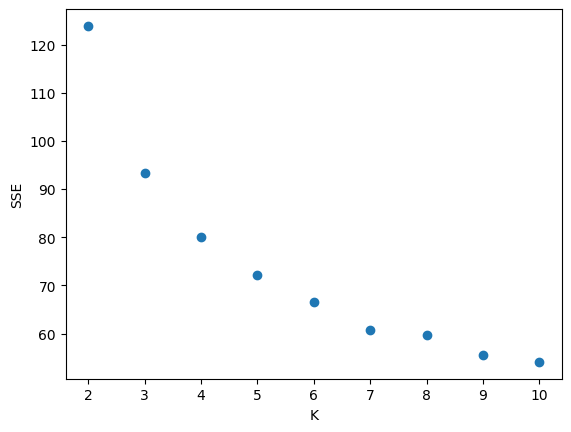

In [44]:
#Visualize the results of the elbow method
fig = plt.figure()
plt.scatter(x = range(2, 11), y = sse_list)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

#beyond k = 3, the sse starts to drop slower, so k = 3 is the optimal number of clusters.

In [15]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results

In [16]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores

In [17]:
#Use the model to select players for Mr. Rooney to consider

In [ ]:
#Write up the results in a separate notebook with supporting visualizations and 
#an overview of how and why you made the choices you did. This should be at least 
#500 words and should be written for a non-technical audience.

SyntaxError: invalid syntax (3214829668.py, line 2)